In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pulp import LpProblem, LpVariable, LpMaximize, lpSum
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


Dataset Description


In [2]:

country_data = pd.read_csv('ESGCountry.csv')
series_data = pd.read_csv('ESGSeries.csv')
series_time_data = pd.read_csv('ESGSeries-Time.csv')
data = pd.read_csv('ESGData.csv')
footnote = pd.read_csv('ESGFootNote.csv')
country_series = pd.read_csv('ESGCountry-Series.csv')



Printing the Features

In [3]:
print("Country Data Columns:", country_data.columns)
print("Series Data Columns:", series_data.columns)
print("Series-Time Data Columns:", series_time_data.columns)
print("Data Columns:", data.columns)
print("Footnote Columns:", footnote.columns)
print("Country-Series Columns:", country_series.columns)

Country Data Columns: Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')
Series Data Columns: Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of me

Data Preprocessing

In [4]:
data.columns = data.columns.str.strip()
series_data.columns = series_data.columns.str.strip()
series_time_data.columns = series_time_data.columns.str.strip()
country_data.columns = country_data.columns.str.strip()
footnote.columns = footnote.columns.str.strip()
country_series.columns = country_series.columns.str.strip()

In [5]:
merged_data = pd.merge(data, series_time_data, left_on='Indicator Code', right_on='SeriesCode')


In [6]:
merged_data = pd.merge(merged_data, country_data, on='Country Code')

In [7]:
merged_data = merged_data.drop(columns=['Unnamed: 66', 'Unnamed: 3'], errors='ignore')


Reshape the Data

In [8]:
reshaped_data = merged_data.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'DESCRIPTION'],
    var_name='Year',
    value_name='Value'
)

In [9]:
reshaped_data['Year'] = pd.to_numeric(reshaped_data['Year'], errors='coerce')

In [10]:
reshaped_data = reshaped_data.dropna(subset=['Year', 'Value'])

In [11]:
scaler = MinMaxScaler()
reshaped_data['Normalized Value'] = scaler.fit_transform(reshaped_data[['Value']])

In [12]:
country_year_data = reshaped_data.groupby(['Country Name', 'Year']).agg({'Normalized Value': 'mean'}).reset_index()


C:\Users\Asus\AppData\Local\Temp\ipykernel_31908\2137916383.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


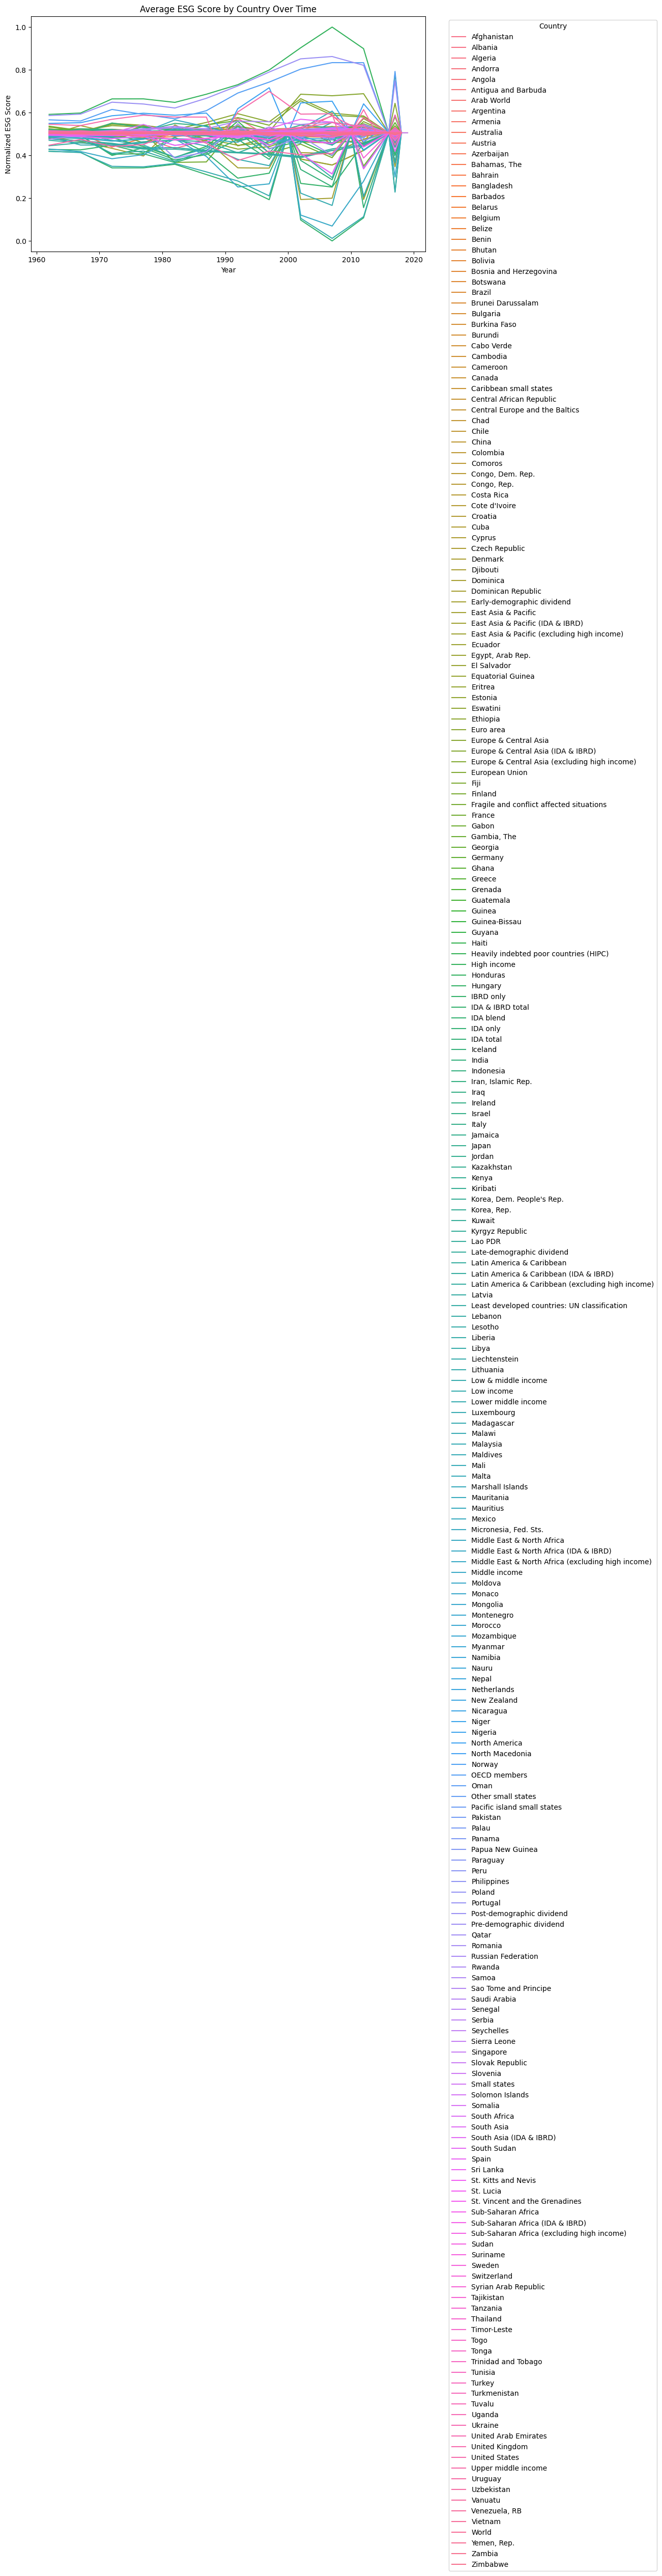

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=country_year_data, x='Year', y='Normalized Value', hue='Country Name')
plt.title('Average ESG Score by Country Over Time')
plt.ylabel('Normalized ESG Score')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
reshaped_data.to_csv('processed_esg_data.csv', index=False)
print("Processed data saved to 'processed_esg_data.csv'")

Processed data saved to 'processed_esg_data.csv'
